# **Amazon Sales EDA**



### Exploratory Data Analysis (EDA) is the process of examining and analyzing data sets to summarize their main characteristics using visual methods and descriptive statistics. The goal of EDA is to gain an understanding of the data and to identify patterns, relationships, and anomalies that can provide insights into the underlying structure of the data.

### The dataset(Source,Content,Use)
  *   Link below
  *   Contains data about sales of Amazon
  *   Can be used to get insights into the various parameters that affect the sales.

###Dataset: https://data.world/anilsharma87/sales/file/Amazon%20Sale%20Report.xlsx  

The dataset consists of 128974 rows

For dataset description refer the report

Goal - Increase revenue and improve product category performance

Refer the Report for the following details:

1.    Business problem/statement/Agenda
2.    Assumptions
3.    Research questions
4.    Hypothesis
5.    Analysis and findings
6.    Suggestions


##Step 1: Select and Download the data

In [ ]:
from google.colab import files
files.upload()

In [2]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d thedevastator/unlock-profits-with-e-commerce-sales-data

 95% 6.00M/6.33M [00:00<00:00, 61.4MB/s]
100% 6.33M/6.33M [00:00<00:00, 63.9MB/s]


In [3]:
!unzip \*.zip

Archive:  unlock-profits-with-e-commerce-sales-data.zip
  inflating: Amazon Sale Report.csv  
  inflating: Cloud Warehouse Compersion Chart.csv  
  inflating: Expense IIGF.csv        
  inflating: International sale Report.csv  
  inflating: May-2022.csv            
  inflating: P  L March 2021.csv     
  inflating: Sale Report.csv         


## Step 2: Data preparation and cleaning


1.   Load the file using pandas
2.   Look at some information about the data and columns
3.   Fix any missing or incorrect values



In [4]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df= pd.read_csv("/content/Amazon Sale Report.csv")

<ipython-input-5-98c1c05dfed4>:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv("/content/Amazon Sale Report.csv")


In [6]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [7]:
df.shape

(128975, 24)

In [8]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

In [9]:
df.columns.to_series()

index                              index
Order ID                        Order ID
Date                                Date
Status                            Status
Fulfilment                    Fulfilment
Sales Channel             Sales Channel 
ship-service-level    ship-service-level
Style                              Style
SKU                                  SKU
Category                        Category
Size                                Size
ASIN                                ASIN
Courier Status            Courier Status
Qty                                  Qty
currency                        currency
Amount                            Amount
ship-city                      ship-city
ship-state                    ship-state
ship-postal-code        ship-postal-code
ship-country                ship-country
promotion-ids              promotion-ids
B2B                                  B2B
fulfilled-by                fulfilled-by
Unnamed: 22                  Unnamed: 22
dtype: object

In [10]:
df.columns = [c.replace(' ', '_') for c in df.columns]
df.columns = [c.replace('-', '_') for c in df.columns]
df.columns

Index(['index', 'Order_ID', 'Date', 'Status', 'Fulfilment', 'Sales_Channel_',
       'ship_service_level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier_Status', 'Qty', 'currency', 'Amount', 'ship_city',
       'ship_state', 'ship_postal_code', 'ship_country', 'promotion_ids',
       'B2B', 'fulfilled_by', 'Unnamed:_22'],
      dtype='object')

In [11]:
df.drop("Unnamed:_22", axis=1,inplace=True)    # Undeterminable data

In [12]:
df.head(2)

,index,Order_ID,Date,Status,Fulfilment,Sales_Channel_,ship_service_level,Style,SKU,Category,...,Qty,currency,Amount,ship_city,ship_state,ship_postal_code,ship_country,promotion_ids,B2B,fulfilled_by
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order_ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales_Channel_      128975 non-null  object 
 6   ship_service_level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier_Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [14]:
df.isnull().sum()

index                     0
Order_ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales_Channel_            0
ship_service_level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier_Status         6872
Qty                       0
currency               7795
Amount                 7795
ship_city                33
ship_state               33
ship_postal_code         33
ship_country             33
promotion_ids         49153
B2B                       0
fulfilled_by          89698
dtype: int64

In [15]:
df.nunique().to_frame(name='Count of unique values')

,Count of unique values
index,128975
Order_ID,120378
Date,91
Status,13
Fulfilment,2
Sales_Channel_,2
ship_service_level,2
Style,1377
SKU,7195
Category,9


In [16]:
df.apply(pd.unique).to_frame(name='Unique Values')

,Unique Values
index,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
Order_ID,"[405-8078784-5731545, 171-9198151-1101146, 404..."
Date,"[04-30-22, 04-29-22, 04-28-22, 04-27-22, 04-26..."
Status,"[Cancelled, Shipped - Delivered to Buyer, Ship..."
Fulfilment,"[Merchant, Amazon]"
Sales_Channel_,"[Amazon.in, Non-Amazon]"
ship_service_level,"[Standard, Expedited]"
Style,"[SET389, JNE3781, JNE3371, J0341, JNE3671, SET..."
SKU,"[SET389-KR-NP-S, JNE3781-KR-XXXL, JNE3371-KR-X..."
Category,"[Set, kurta, Western Dress, Top, Ethnic Dress,..."


In [17]:
df.Status.unique()

array(['Cancelled', 'Shipped - Delivered to Buyer', 'Shipped',
       'Shipped - Returned to Seller', 'Shipped - Rejected by Buyer',
       'Shipped - Lost in Transit', 'Shipped - Out for Delivery',
       'Shipped - Returning to Seller', 'Shipped - Picked Up', 'Pending',
       'Pending - Waiting for Pick Up', 'Shipped - Damaged', 'Shipping'],
      dtype=object)

In [18]:
df['currency'].unique()

array(['INR', nan], dtype=object)

In [19]:
df['currency'].fillna(method='ffill',inplace=True)
df['currency'].unique()

array(['INR'], dtype=object)

In [20]:
print(df['ship_country'].unique())
df['ship_country'].isnull().sum()

['IN' nan]


33

In [21]:
df['Size'].unique()

array(['S', '3XL', 'XL', 'L', 'XXL', 'XS', '6XL', 'M', '4XL', '5XL',
       'Free'], dtype=object)

In [22]:
df['Category'].unique()

array(['Set', 'kurta', 'Western Dress', 'Top', 'Ethnic Dress', 'Bottom',
       'Saree', 'Blouse', 'Dupatta'], dtype=object)

In [23]:
df['Date'].max()

'06-29-22'

In [24]:
df['Date']

0         04-30-22
1         04-30-22
2         04-30-22
3         04-30-22
4         04-30-22
            ...   
128970    05-31-22
128971    05-31-22
128972    05-31-22
128973    05-31-22
128974    05-31-22
Name: Date, Length: 128975, dtype: object

In [25]:
df['Date'].min()

'03-31-22'

In [26]:
print(df['Sales_Channel_'].unique())
df[df['Sales_Channel_']=='Non-Amazon'].count()

['Amazon.in' 'Non-Amazon']


index                 124
Order_ID              124
Date                  124
Status                124
Fulfilment            124
Sales_Channel_        124
ship_service_level    124
Style                 124
SKU                   124
Category              124
Size                  124
ASIN                  124
Courier_Status        124
Qty                   124
currency              124
Amount                  0
ship_city             124
ship_state            124
ship_postal_code      124
ship_country          124
promotion_ids           0
B2B                   124
fulfilled_by            0
dtype: int64

### Some observations by looking at the dataset: 👀
The dataset consists of 128974 entries and 23 columns

1.   **Size**: the sizes vary from XS to 5XL and freesize
2.   **Category** : Many categories of products are present in this dataset, namely Set, kurta, Western Dress, Top, Ethnic Dress, Bottom,Saree, Blouse, Dupatta
3.   **Dates** can be used for analysing the time period and sales, dates in the dataset **vary from 03-31-22 to 06-29-22**
4.   Status : contains 13 unique values
5.   Fulfillment
6.   Quantity
7.  **Amount**: contains some null values that need to be taken care of
8.   ship city and state
9.   B2B  Business or individual customer

dropping
10.  Country: the currency is only either INR or nan, so the country is India column can be dropped
11.  Currency column can be dropped
12.  Unnamed 22 dropped
13.  fulfilled by col can be dropped only contains easy ship or nan



### Cleaning 🧹


1.    Columns to be dropped

       *  Country
       *  Currency
       *  fulfilled by
       *  Unnamed: 22
---
2.   Column Creation

      *   month - to use in analysis and groupbys


---
3.   Column Value Ordering
      *   size - created an ordered category of based on product sizes  

---
4.   Columns fillna()   

      *   promotion-ids - will fill missing with 'No Promotion'
      *   Courier Status - will fill missing with 'Unknown'
      *   Amount - will fill missing with 0, since 97% of all Orders with missing Amount are cancelled
      *   ship-city - Unknown where null
      *   ship-state- unknown where null
      *   ship-postal-code - unknown where null

---













Dropping Columns

In [27]:
df.drop(columns=['ship_country','currency','fulfilled_by'],inplace=True,axis=1)

In [28]:
df.head(1)
df.shape

(128975, 20)

Column creation

In [29]:
df['Date']=pd.to_datetime(df['Date'])
df['month']=df['Date'].dt.month_name()
print('march entries: ',len(df.where(df['month']=='March').dropna()))    ## number of entries of march
print('percentage of March entries: ',round(len(df.where(df['month']=='March').dropna())/df.shape[0]*100,3))
df['month']

march entries:  108
percentage of March entries:  0.084


0         April
1         April
2         April
3         April
4         April
          ...  
128970      May
128971      May
128972      May
128973      May
128974      May
Name: month, Length: 128975, dtype: object

Column ordering

In [30]:
# Define the desired order for the 'size' column
size_order = ['Free','XS', 'S', 'M', 'L', 'XL', 'XXL', '3XL', '4XL', '5XL', '6XL']

# Create an ordered categorical variable for the 'size' column
df['Size'] = pd.Categorical(df['Size'], categories=size_order, ordered=True)

Columns fillna()

In [31]:
df.loc[df["promotion_ids"].isnull(), "promotion_ids"] = "No promotion"
df.promotion_ids

0                                              No promotion
1         Amazon PLCC Free-Financing Universal Merchant ...
2              IN Core Free Shipping 2015/04/08 23-48-5-108
3                                              No promotion
4                                              No promotion
                                ...                        
128970                                         No promotion
128971         IN Core Free Shipping 2015/04/08 23-48-5-108
128972                                         No promotion
128973         IN Core Free Shipping 2015/04/08 23-48-5-108
128974         IN Core Free Shipping 2015/04/08 23-48-5-108
Name: promotion_ids, Length: 128975, dtype: object

In [32]:
df.loc[df["Courier_Status"].isnull(), "Courier_Status"] = "Unknown"
df.Courier_Status

0         Unknown
1         Shipped
2         Shipped
3         Unknown
4         Shipped
           ...   
128970    Shipped
128971    Shipped
128972    Shipped
128973    Shipped
128974    Shipped
Name: Courier_Status, Length: 128975, dtype: object

In [33]:
print('Number of rows where amount is null: ', len(df[df['Amount'].isnull()]))
print('Number of rows where amount is null and order is cancelled: ',len(df[(df['Amount'].isnull()) & (df['Status']=='Cancelled')]))
print(round(len(df[(df['Amount'].isnull()) & (df['Status']=='Cancelled')])/len(df[df['Amount'].isnull()])*100,2), '% -> amount null due to orders cancelled')

Number of rows where amount is null:  7795
Number of rows where amount is null and order is cancelled:  7566
97.06 % -> amount null due to orders cancelled


In [34]:
df['Amount'].fillna(0,inplace=True)
df.where(df['Amount']==0).dropna().head(3)

,index,Order_ID,Date,Status,Fulfilment,Sales_Channel_,ship_service_level,Style,SKU,Category,...,ASIN,Courier_Status,Qty,Amount,ship_city,ship_state,ship_postal_code,promotion_ids,B2B,month
8,8.0,407-5443024-5233168,2022-04-30,Cancelled,Amazon,Amazon.in,Expedited,SET200,SET200-KR-NP-A-XXXL,Set,...,B08L91ZZXN,Cancelled,0.0,0.0,HYDERABAD,TELANGANA,500008.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False,April
29,29.0,404-5933402-8801952,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,JNE2132,JNE2132-KR-398-XXXL,kurta,...,B07JG3CND8,Unknown,0.0,0.0,GUWAHATI,ASSAM,781003.0,No promotion,False,April
65,65.0,171-4137548-0481151,2022-04-30,Cancelled,Amazon,Amazon.in,Expedited,JNE3373,JNE3373-KR-XXL,kurta,...,B082W8RWN1,Cancelled,0.0,0.0,Dahod,Gujarat,389151.0,No promotion,False,April


In [35]:
df['ship_city'].fillna('unknown', inplace = True)
df['ship_state'].fillna('unknown', inplace = True)
df['ship_postal_code'].fillna('unknown', inplace = True)

## 📊 Visualisations 📈

check if the data is ready for visualisations

In [36]:
df.isnull().sum()

index                 0
Order_ID              0
Date                  0
Status                0
Fulfilment            0
Sales_Channel_        0
ship_service_level    0
Style                 0
SKU                   0
Category              0
Size                  0
ASIN                  0
Courier_Status        0
Qty                   0
Amount                0
ship_city             0
ship_state            0
ship_postal_code      0
promotion_ids         0
B2B                   0
month                 0
dtype: int64

### Research Questions Visualising

#### Question 1: variation of sales w.r.t. months in the second quartile

In [210]:
var=df[['month','Amount']]
# Not including march
# Define the desired order for the 'month' column
month_order = ['April','May','June']

# Create an ordered categorical variable for the 'size' column
var['month'] = pd.Categorical(var['month'], categories=month_order, ordered=True)
var.head()

<ipython-input-210-47df8568d7f3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  var['month'] = pd.Categorical(var['month'], categories=month_order, ordered=True)


,month,Amount
0,April,647.62
1,April,406.00
2,April,329.00
3,April,753.33
4,April,574.00


In [211]:
print('Revenues for the particular months')
var=var.groupby("month")['Amount'].sum()
var

Revenues for the particular months


month
April    28838708.32
May      26226476.75
June     23425809.38
Name: Amount, dtype: float64

Since March only has 1 day (31 March) in the dataset, it needs to be dropped

In [205]:
var=var.to_frame()

In [212]:
print(type(var))
var

<class 'pandas.core.series.Series'>


month
April    28838708.32
May      26226476.75
June     23425809.38
Name: Amount, dtype: float64

In [232]:
# Calculating percentage decrease
d1=(var.April - var.May)/var.April *100
d1
d2=(var.May - var.June)/var.May *100
d2

10.67877853627442

<ipython-input-275-196591c60fd2>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(list(range(0,35,5)));


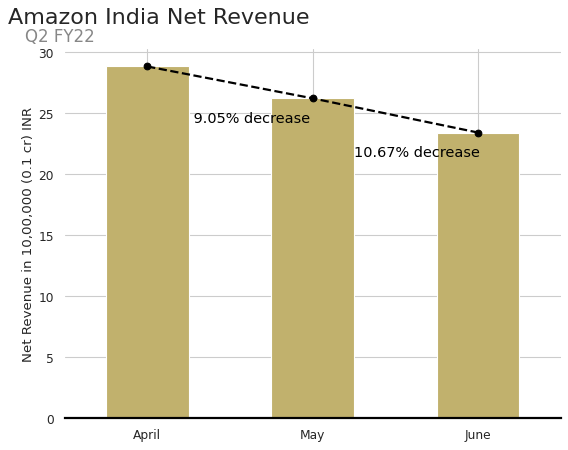

In [275]:
# Size of the figure
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)

# Style and Color
sns.set_style(style='whitegrid')
color=sns.color_palette("Set2",desat=0.4)[5]

# Bar plot
var.plot.bar(color=color)

# Axes and Figure
ax=plt.gca()
fig=plt.gcf()
ax.xaxis.label.set_visible(False)
plt.xticks(rotation=45)

# Title
ax.set_title('Amazon India Net Revenue', fontsize=20, x=.19, y=1.05)
ax.text(-.08, 1.02, 'Q2 FY22', fontsize=15, color='#878787', transform=ax.transAxes)

# Y axis Ticks and Label
ax.set_yticklabels(list(range(0,35,5)));
ax.set_ylabel('Net Revenue in 10,00,000 (0.1 cr) INR', fontsize=12, labelpad=3)

# Legend
ax.legend().set_visible(False)
ax.get_legend().remove()

# Spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_linewidth(2)
ax.spines['bottom'].set_color('black')

# Line plot
var.plot.line(linestyle='--', linewidth=2, color='black', marker='o')
#ax.plot(var.index, var['Amount'], linestyle='--', linewidth=2, color='black', marker='o')

# Adding text between 2 bars
plt.text(0.25, var.May-2000000, " 9.05% decrease",color='black',size=13)
plt.text(1.25, var.June-2000000, "10.67% decrease",color='black',size=13)

plt.show();

#### Question 2: product categories or styles that generate the highest sales revenue

#### Question 3: The average order quantity for different product categories?

#### Question 4: The distribution of sales revenue across different size variations within a specific style or category/ any size preferences among customers that impact sales

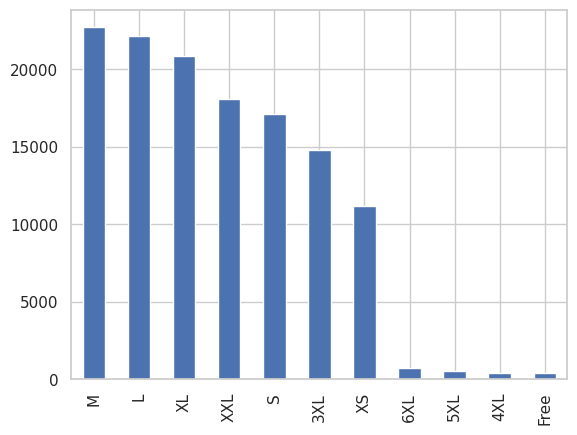

In [276]:
df.Size.value_counts().plot(kind='bar')
sns.set()

#### Question5: Any associations between specific ship-cities or ship-states and popular product categories or styles

# problems faced
missing amount data
 tackled by some exploration and concluding that 97% amount was missing for the cancelled orders hence can be put 0

#Questions
sizes in demand/sales by product size

cities/states with highest orders

Product category distribution

shipping state for a particular category western dresses/set/kurta/ ethnic dress

distribution of amount/ for a particular category/ distribution of amount for  top 5 categories

top 5 ship state total amount distribution

top 5 ship city total amount distribution

Amazon india net revenue for Q2

Average monthly order amount

Top product revenue by month

Percentage of revenue due to top 5 categories




